### Feathers in Focus: AML 2025 Kaggle Challenge 🪶
### Athina Papatriantafyllou • Alexandra Holíková • Buğra Sipahioğlu

## Preprocessing
> **Setup Commands (in terminal):**
> ```bash
> python -m venv venv
> source venv/bin/activate
> pip install -r requirements.txt
> ```


In [41]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

### Load the data

In [59]:
train_df = pd.read_csv("Data/Raw/train_images.csv")
test_df = pd.read_csv("Data/Raw/test_images_path.csv")
class_names = np.load("Data/Raw/class_names.npy", allow_pickle=True).item()

# Load attributes
attributes = np.load("Data/Raw/attributes.npy", allow_pickle=True)
with open("Data/Raw/attributes.txt", "r") as f:
    attribute_names = [line.strip().split(' ', 1)[1] for line in f.readlines()]

print("Loading the data....")
print(f"-Train Size: {len(train_df)} \n-Test Size: {len(test_df)} \n-Number of Classes: {len(class_names)}")
print(f"-Attributes: {len(attribute_names)} (shape: {attributes.shape if hasattr(attributes, 'shape') else 'N/A'})")


Loading the data....
-Train Size: 3926 
-Test Size: 4000 
-Number of Classes: 200
-Attributes: 312 (shape: (200, 312))


### Inspect the data

Random images (with their labels)from the training set:


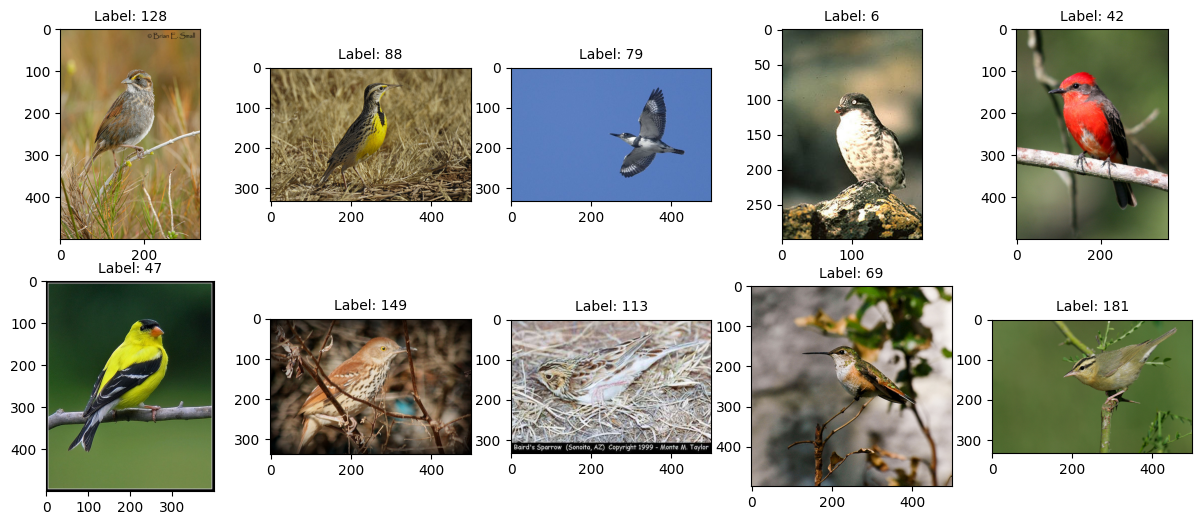

In [72]:
# Inspect the training set by showing 10 random images
print("Random images (with their labels)from the training set:")
samples = train_df.sample(10)
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for ax, (_, row) in zip(axes.flat, samples.iterrows()):
    img = Image.open(f"Data/Raw/train_images{row['image_path']}")
    label_name = class_names.get(row['label'], f"Label: {row['label']}")
    ax.set_title(label_name, fontsize=10)
    ax.imshow(img)
plt.show()

In [ ]:
# Inspect the attributes
print("Attributes:")
for i in range(len(attribute_names)):
    print(f"{i}: {attribute_names[i]}")

Attributes:
0: has_bill_shape::curved_(up_or_down)
1: has_bill_shape::dagger
2: has_bill_shape::hooked
3: has_bill_shape::needle
4: has_bill_shape::hooked_seabird
5: has_bill_shape::spatulate
6: has_bill_shape::all-purpose
7: has_bill_shape::cone
8: has_bill_shape::specialized
9: has_wing_color::blue
10: has_wing_color::brown
11: has_wing_color::iridescent
12: has_wing_color::purple
13: has_wing_color::rufous
14: has_wing_color::grey
15: has_wing_color::yellow
16: has_wing_color::olive
17: has_wing_color::green
18: has_wing_color::pink
19: has_wing_color::orange
20: has_wing_color::black
21: has_wing_color::white
22: has_wing_color::red
23: has_wing_color::buff
24: has_upperparts_color::blue
25: has_upperparts_color::brown
26: has_upperparts_color::iridescent
27: has_upperparts_color::purple
28: has_upperparts_color::rufous
29: has_upperparts_color::grey
30: has_upperparts_color::yellow
31: has_upperparts_color::olive
32: has_upperparts_color::green
33: has_upperparts_color::pink
34: h

Inspect the balance in the training dataset


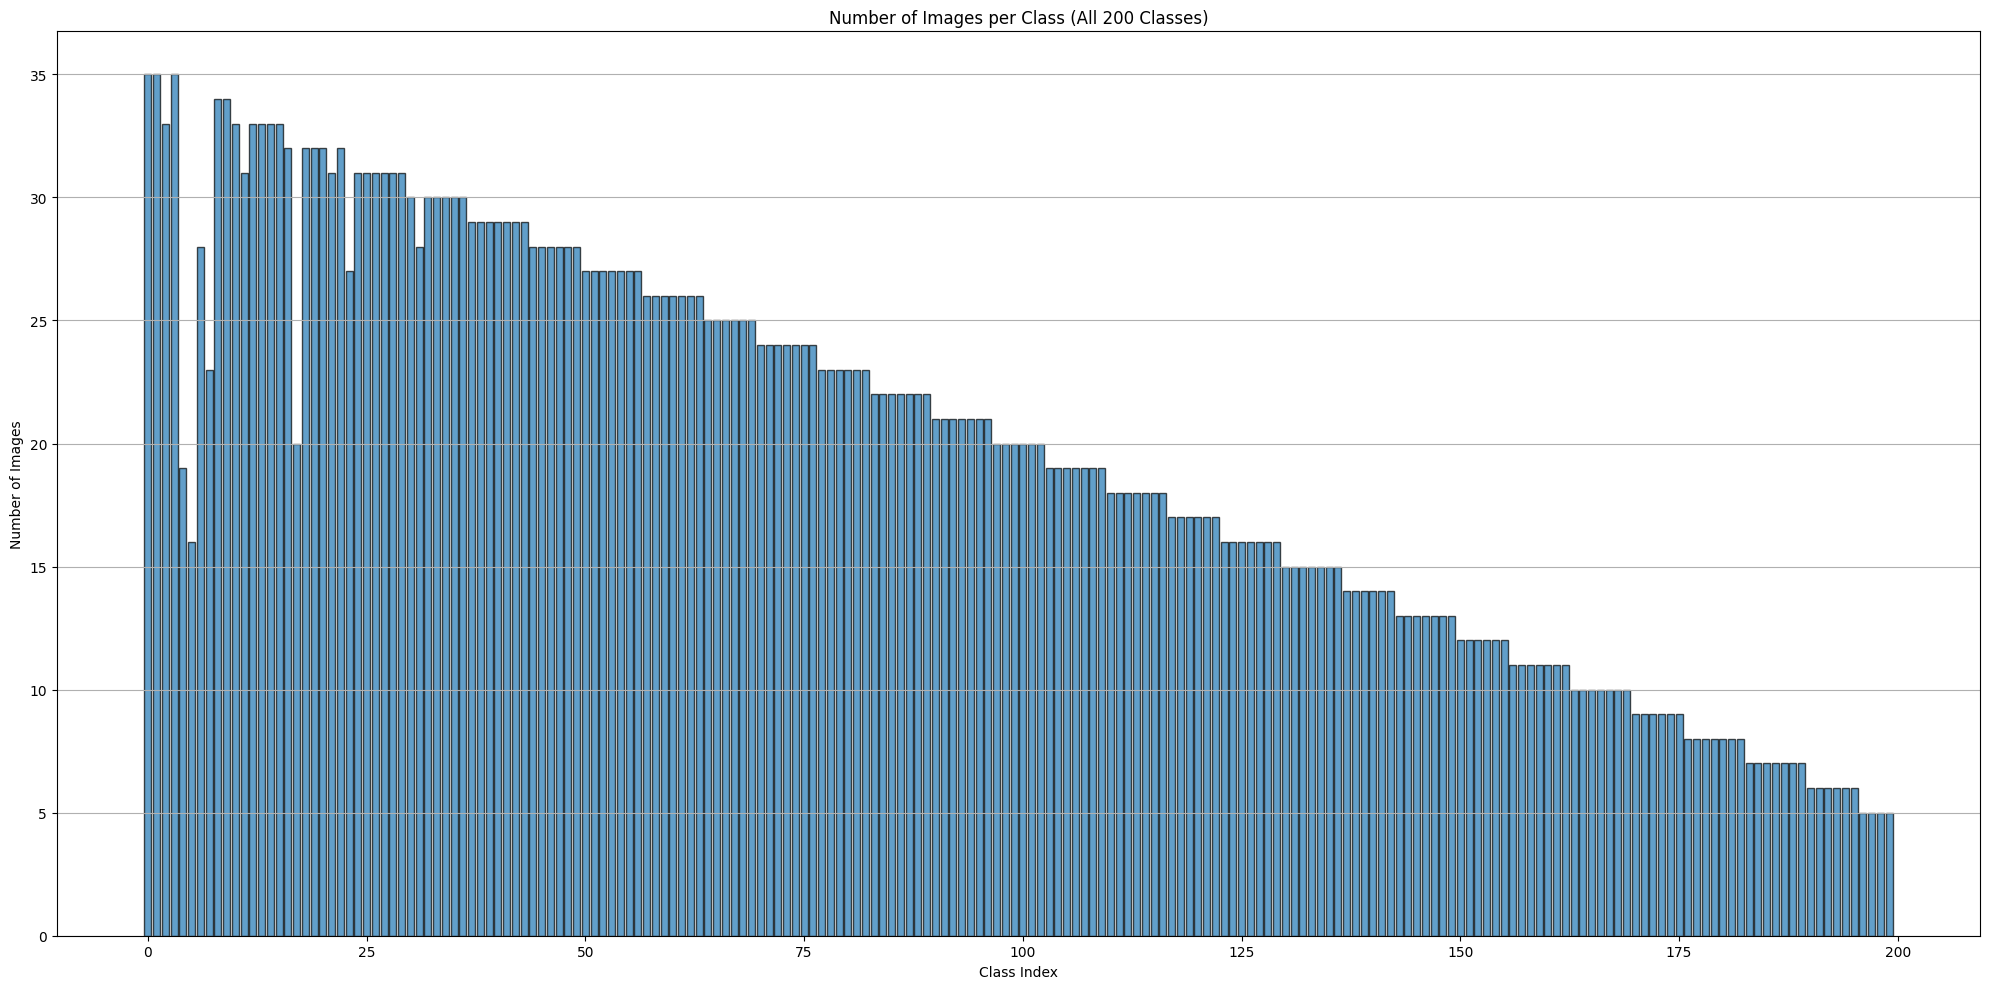

Statistics:
-Number of unique classes: 200
-Average number of images per class: 19.63
-Standard deviation of images per class: 8.39 (Lower the std, more balanced the dataset)
-Minimum number of images per class: 5
-Maximum number of images per class: 35


In [109]:
class_counts = train_df['label'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(20, 10))

# Show the count for each class
ax.bar(range(len(class_counts)), class_counts.values, tick_label=None, edgecolor='k', alpha=0.7)
ax.set_xlabel('Class Index')
ax.set_ylabel('Number of Images')
ax.set_title('Number of Images per Class (All 200 Classes)')
ax.grid(axis='y')
plt.tight_layout()
plt.show()

# Statistics
print("Statistics:")
print(f"-Number of unique classes: {len(class_names)}")
print(f"-Average number of images per class: {class_counts.mean():.2f}")
print(f"-Standard deviation of images per class: {class_counts.std():.2f} (Lower the std, more balanced the dataset)")
print(f"-Minimum number of images per class: {class_counts.min()}")
print(f"-Maximum number of images per class: {class_counts.max()}")
